# Exploratory Data Analysis


## 1. Load and Inspect Dataset
- Load the dataset using TensorFlow Datasets (TFDS).
- Display basic information about the dataset.


## 2. Visualize Dataset
- Display some sample images from each class.

## 3. Class Distribution
- Plot the distribution of classes in the dataset.

## 4. Basic Statistics
- Calculate mean, median, standard deviation of image pixel values.

## 5. Check for Missing or Corrupt Data
- Identify any missing labels or corrupt images.

## 6. Data Preprocessing
- Normalize and resize images.
- Display some images before and after preprocessing.

## 7. Explore Patterns and Correlations
- Analyze and visualize any significant patterns in the data.



## 1. Load and Inspect Dataset
- Load the dataset using TensorFlow Datasets (TFDS).
- Display basic information about the dataset.


In [4]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))
from src.utils import visualization_utils as vu
from src.utils import dataset_utils as du


import tensorflow as tf
import tensorflow_datasets as tfds

# prevent TensorFlow from allocating all the GPU memory at the start
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for gpu in physical_devices:
        tf.config.experimental.set_memory_growth(gpu, True)

# Define data directories
base_dir = '/tf/projects/malaria-image-recognition/notebooks/'
data_dir = os.path.join(base_dir, 'data', 'raw')

# Load the dataset with TensorFlow Datasets
datasets, _info = tfds.load('malaria',
                            split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                            data_dir=data_dir,
                            shuffle_files=True,
                            download=True,
                            as_supervised=True,
                            with_info=True)

train_dataset, test_dataset, val_dataset = datasets
print(_info)

# Print five random samples
print('\n\n Random samples from train_dataset: \n\n')
du.print_sample_info(train_dataset)

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/tf/projects/malaria-image-recognition/notebooks/data/raw/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite 

2024-07-19 14:51:05.820852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



## 2. Visualize Dataset
- Display some sample images from each class.


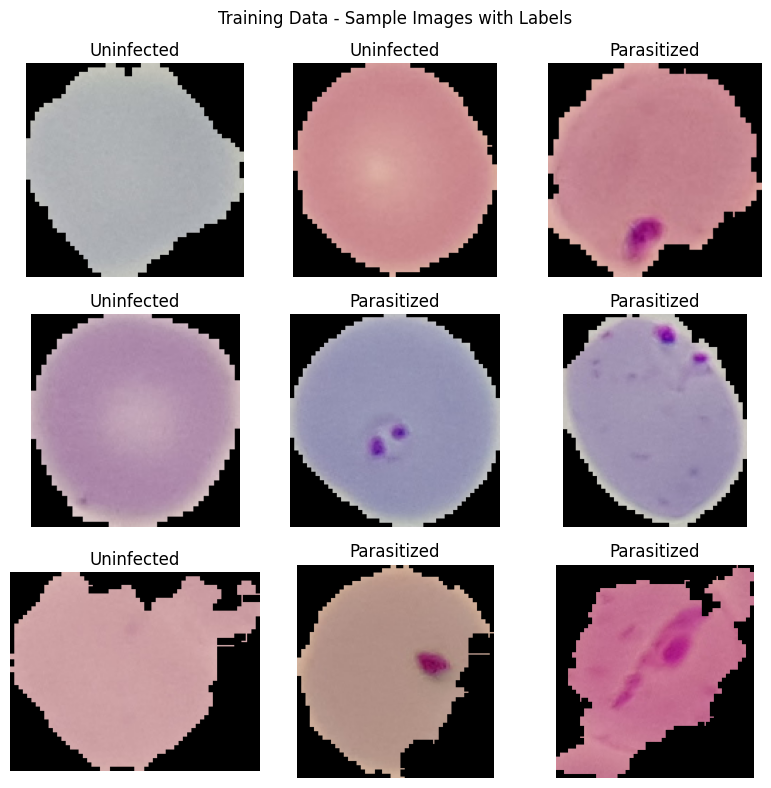

In [3]:
# Training samples
vu.visualize_sample_images_with_labels(train_dataset, "Training Data")

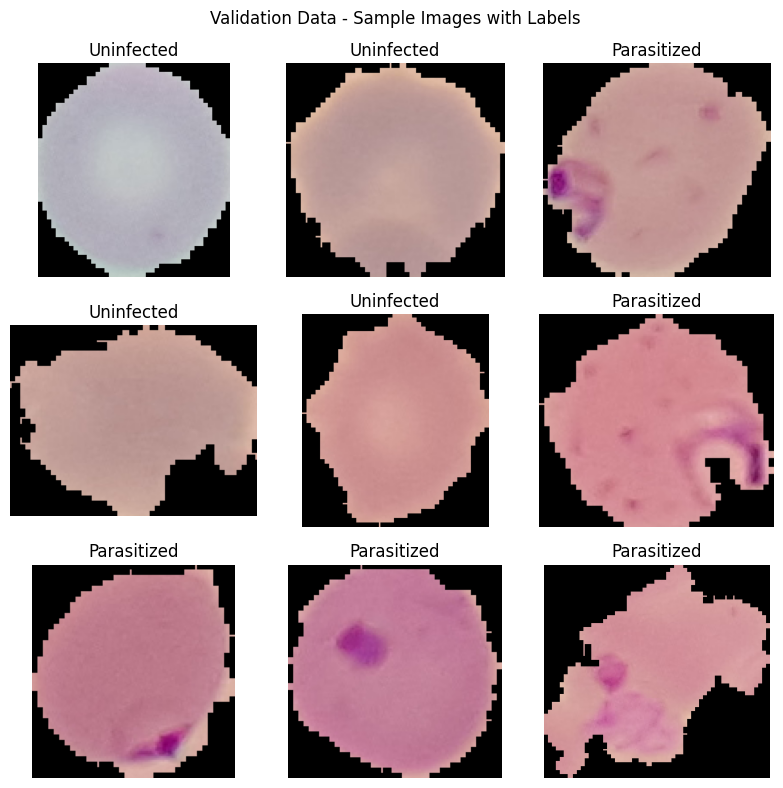

In [4]:
# Validation samples
vu.visualize_sample_images_with_labels(val_dataset, "Validation Data")

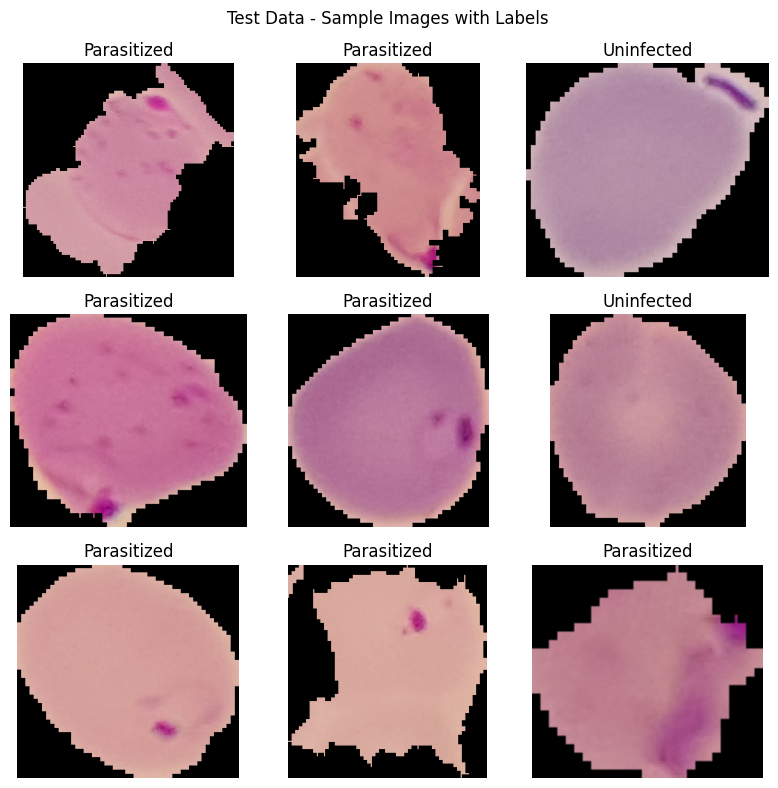

In [5]:
# Test samples
vu.visualize_sample_images_with_labels(test_dataset, "Test Data")

## 3. Class Distribution
- Plot the distribution of classes in the dataset.

2024-07-19 14:50:37.715917: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-07-19 14:50:40.506918: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-07-19 14:50:43.496012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


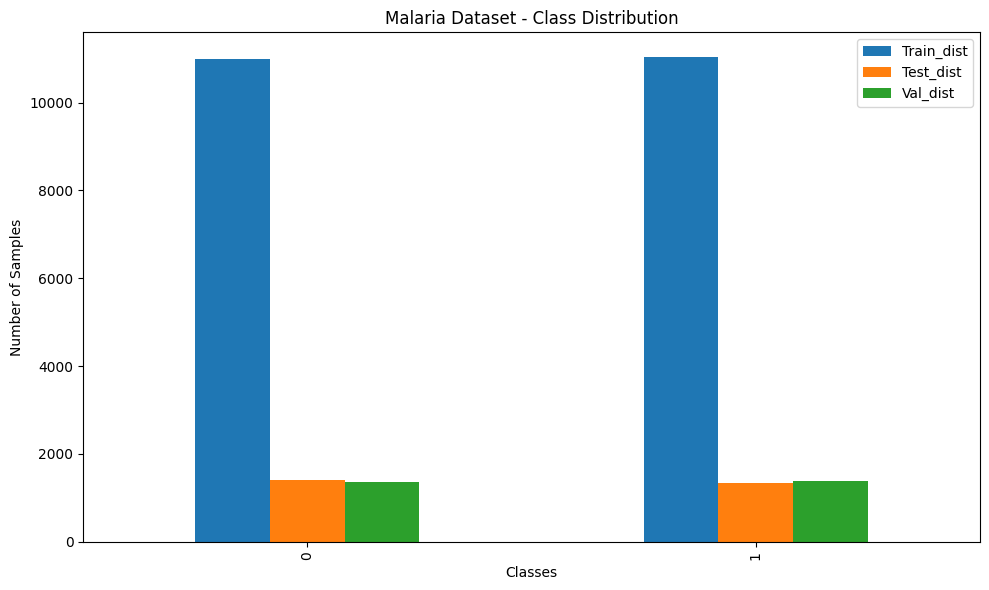

In [2]:
vu.visualize_class_distribution(train_dataset, test_dataset, val_dataset, 'Malaria Dataset')


## 4. Basic Statistics
- Calculate mean, median, standard deviation of image pixel values.


2024-07-19 12:39:48.216509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


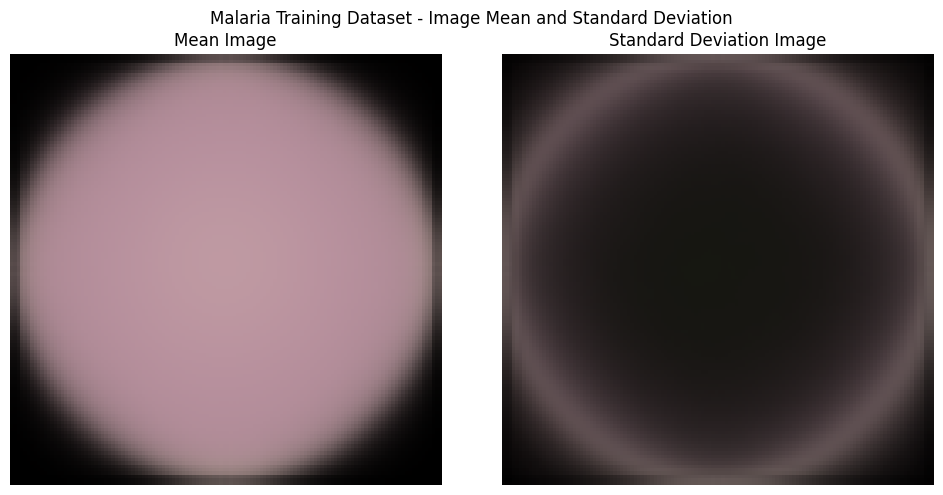

In [3]:
vu.visualize_image_mean_and_std(train_dataset, 'Malaria Training Dataset')

"""
From the provided mean and standard deviation images of the malaria training dataset, we can infer the following:

### Mean Image:
1. **Uniform Color**: The mean image appears to be uniformly colored with a slight gradient towards the edges. This suggests that the average pixel values across all the images are quite similar, indicating a general uniformity in the dataset.
2. **Blurry Appearance**: The mean image is blurry, which is expected since averaging many images smooths out individual variations. This indicates that there is no strong, consistent pattern in the pixel values across the entire dataset.
3. **Centered Structure**: The mean image shows a central structure which could indicate that most images in the dataset have a central focus area.

### Standard Deviation Image:
1. **Low Variability**: The standard deviation image appears mostly dark, indicating low variability in pixel values across the dataset. This suggests that most images have similar pixel values, particularly in the central region.
2. **Higher Variability at Edges**: There is a slight increase in brightness towards the edges, indicating higher variability. This could be due to differences in image sizes, shapes, or positioning of the subjects in the images.

### General Insights:
- **Consistency**: The dataset appears to be quite consistent with low variability in the central region of the images.
- **Normalization**: Normalizing the images could be beneficial, as the low variability suggests that the images are already quite similar.
- **Data Augmentation**: Applying data augmentation techniques (such as random cropping, rotation, and scaling) could help increase variability and improve model generalization.

These visualizations provide a good overview of the dataset's characteristics, which can guide decisions on preprocessing steps and model training strategies.
"""

## 5. Check for Missing or Corrupt Data
- Identify any missing labels or corrupt images.


In [4]:
train_missing = du.check_missing_data(train_dataset)
print(f"Missing or corrupt data in training set: {train_missing}")

Missing or corrupt data in training set: 0


2024-07-19 12:40:29.293095: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
test_missing = du.check_missing_data(test_dataset)
print(f"Missing or corrupt data in test set: {test_missing}")

Missing or corrupt data in test set: 0


2024-07-19 12:40:41.000748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [3]:
val_missing = du.check_missing_data(val_dataset)
print(f"Missing or corrupt data in val set: {val_missing}")

Missing or corrupt data in val set: 0


2024-07-19 14:51:00.346073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence




## 7. Explore Patterns and Correlations
- Analyze and visualize any significant patterns in the data.



## 6. Data Preprocessing
- Normalize and resize images.
- Display some images before and after preprocessing.

In [8]:
# Before preprocessing
print("Before preprocessing:")
# Assuming train_dataset is defined elsewhere in your script
du.print_sample_info(train_dataset)

# Preprocess the dataset
train_dataset_preprocessed = du.preprocess_dataset(train_dataset)

# After preprocessing
print("After preprocessing:")
du.print_sample_info(train_dataset_preprocessed)

Before preprocessing:
Sample 1:
Image shape: (109, 172, 3)
Image size: 56244
Image dimensions: 3
Label: 1

Sample 2:
Image shape: (154, 172, 3)
Image size: 79464
Image dimensions: 3
Label: 1

Sample 3:
Image shape: (118, 112, 3)
Image size: 39648
Image dimensions: 3
Label: 1

Sample 4:
Image shape: (136, 136, 3)
Image size: 55488
Image dimensions: 3
Label: 0

Sample 5:
Image shape: (139, 145, 3)
Image size: 60465
Image dimensions: 3
Label: 0

After preprocessing:


2024-07-19 12:45:35.889355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-07-19 12:45:37.335274: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 16777728000 bytes after encountering the first element of size 16777728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-07-19 12:45:46.193855: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:185: Filling up shuffle buffer (this may take a while): 115 of 10000


Sample 1:
Image shape: (64, 128, 128, 3)
Image size: 3145728
Image dimensions: 4
Label: [1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0]

Sample 2:
Image shape: (64, 128, 128, 3)
Image size: 3145728
Image dimensions: 4
Label: [0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0
 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1]

Sample 3:
Image shape: (64, 128, 128, 3)
Image size: 3145728
Image dimensions: 4
Label: [1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0
 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1]

Sample 4:
Image shape: (64, 128, 128, 3)
Image size: 3145728
Image dimensions: 4
Label: [0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1]

Sample 5:
Image shape: (64, 128, 128, 3)
Image size: 3145728
Image dimensions: 4
Label: [0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1

2024-07-19 12:45:56.597014: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
2024-07-19 12:45:56.611723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
# Before preprocessing
print("Before preprocessing:")
# Assuming train_dataset is defined elsewhere in your script
du.print_sample_info(test_dataset)

# Preprocess the dataset
test_dataset_preprocessed = du.preprocess_dataset(test_dataset)

# After preprocessing
print("After preprocessing:")
du.print_sample_info(test_dataset_preprocessed)

Before preprocessing:
Sample 1:
Image shape: (124, 127, 3)
Image size: 47244
Image dimensions: 3
Label: 0

Sample 2:
Image shape: (130, 130, 3)
Image size: 50700
Image dimensions: 3
Label: 0

Sample 3:
Image shape: (124, 148, 3)
Image size: 55056
Image dimensions: 3
Label: 1

Sample 4:
Image shape: (91, 100, 3)
Image size: 27300
Image dimensions: 3
Label: 1

Sample 5:
Image shape: (133, 115, 3)
Image size: 45885
Image dimensions: 3
Label: 0

After preprocessing:


2024-07-19 13:03:11.867959: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-07-19 13:03:12.768594: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 16777728000 bytes after encountering the first element of size 16777728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


Sample 1:
Image shape: (64, 128, 128, 3)
Image size: 3145728
Image dimensions: 4
Label: [1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0
 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1]

Sample 2:
Image shape: (64, 128, 128, 3)
Image size: 3145728
Image dimensions: 4
Label: [1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0]

Sample 3:
Image shape: (64, 128, 128, 3)
Image size: 3145728
Image dimensions: 4
Label: [0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1
 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1]

Sample 4:
Image shape: (64, 128, 128, 3)
Image size: 3145728
Image dimensions: 4
Label: [0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0
 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0]

Sample 5:
Image shape: (64, 128, 128, 3)
Image size: 3145728
Image dimensions: 4
Label: [1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1

2024-07-19 13:03:15.572463: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



## 7. Explore Patterns and Correlations
- Analyze and visualize any significant patterns in the data.

In [5]:
# Before preprocessing
print("Before preprocessing:")
# Assuming train_dataset is defined elsewhere in your script
du.print_sample_info(val_dataset)

# Preprocess the dataset
val_dataset_preprocessed = du.preprocess_dataset(val_dataset)

# After preprocessing
print("After preprocessing:")
du.print_sample_info(val_dataset_preprocessed)

Before preprocessing:
Sample 1:
Image shape: (118, 139, 3)
Image size: 49206
Image dimensions: 3
Label: 1

Sample 2:
Image shape: (121, 139, 3)
Image size: 50457
Image dimensions: 3
Label: 0

Sample 3:
Image shape: (130, 136, 3)
Image size: 53040
Image dimensions: 3
Label: 1

Sample 4:
Image shape: (121, 130, 3)
Image size: 47190
Image dimensions: 3
Label: 1

Sample 5:
Image shape: (124, 130, 3)
Image size: 48360
Image dimensions: 3
Label: 0



2024-07-19 14:51:25.808986: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


After preprocessing:


2024-07-19 14:51:27.097649: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 16777728000 bytes after encountering the first element of size 16777728 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


Sample 1:
Image shape: (64, 128, 128, 3)
Image size: 3145728
Image dimensions: 4
Label: [1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1]

Sample 2:
Image shape: (64, 128, 128, 3)
Image size: 3145728
Image dimensions: 4
Label: [1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0]

Sample 3:
Image shape: (64, 128, 128, 3)
Image size: 3145728
Image dimensions: 4
Label: [1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1
 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1]

Sample 4:
Image shape: (64, 128, 128, 3)
Image size: 3145728
Image dimensions: 4
Label: [0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0]

Sample 5:
Image shape: (64, 128, 128, 3)
Image size: 3145728
Image dimensions: 4
Label: [1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1

2024-07-19 14:51:34.644650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
